# UFRJ Analytica - Ideias para análise de dados do Spotify

### Importando as bibliotecas e configurando o notebook

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
pd.plotting.register_matplotlib_converters()

#### Lendo o arquivo de dados gerias 'data_o.csv'
Uma das ideias iniciais seria partir do questionamento -  **Modernidade líquida** significaria também músicas mais rápidas?
Para responder esta pergunta, podemos analisar a variação da duração das músicas ao longo dos anos, desde 1921 até 2020.

Vamos inicialmente carregar em 'general_data' o arquivo data_o.csv, que contém dados gerais:

In [12]:
general_data = pd.read_csv("data_o.csv")
general_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


#### Convertendo o tempo de duração das músicas

Vamos agora converter o tempo de duração das músicas, inicialmente em milisegundos, para segundos. Afinal, estamos muito mais acostumados a ver o tempo de duração das músicas em segundos.

Definindo uma função para realizar este procedimento:

In [9]:
def convert_time(row: 'data frame row') -> 'row':
    duration = row.duration_ms
    row.duration_ms = duration * (10**-3)
    return row

Aplicando essa função no data frame:

In [13]:
general_data = general_data.apply(convert_time, axis='columns')
general_data = general_data.rename(columns={"durantion_ms": "duration_seconds"})
general_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831.667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180.533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500.062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210.000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166.693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Vamos agora agrupar o 'momentos músicais' por décadas, para depois ficar mais fácil de compará-las:

In [15]:
initial_dict = {}

def duration_by_decades(data_frame :'data_frame', decades_dict: dict) -> dict:
    current_decade = 1920
    for i in range(11):
        period_duration = data_frame.loc[(data_frame.year >= current_decade) & (data_frame.year < current_decade + 10)]
        music_durantion_decade = mean(period_duration["duration_ms"])
        decades_dict[f"{current_decade}'s"] = float(f"{music_durantion_decade:.2f}")
        current_decade += 10

    return decades_dict

musical_decades = duration_by_decades(general_data, initial_dict)
musical_decades

{"1920's": 183.77,
 "1930's": 207.62,
 "1940's": 217.89,
 "1950's": 220.48,
 "1960's": 211.67,
 "1970's": 254.05,
 "1980's": 252.12,
 "1990's": 248.6,
 "2000's": 239.52,
 "2010's": 227.09,
 "2020's": 193.73}

Construindo então um data frame com as informações colhidas:

In [18]:
values = [musical_decades[decade] for decade in musical_decades.keys()]
indexes = [decade for decade in musical_decades.keys()]

decades_df = pd.DataFrame({"Average Duration": [*values]},
                          index=[indexes])

decades_df = pd.DataFrame({'Average Music Duration': [183.77, 207.62, 217.89, 220.48, 211.67, 254.05, 252.12,
                                                     248.6, 239.52, 227.09, 193.73]},
                                                     index=["1920's", "1930's", "1940's", "1950's", "1960's",
                                                      "1970's", "1980's", "1990's", "2000's", "2010's",
                                                      "2020's"])
decades_df

,Average Music Duration
1920's,183.77
1930's,207.62
1940's,217.89
1950's,220.48
1960's,211.67
1970's,254.05
1980's,252.12
1990's,248.60
2000's,239.52
2010's,227.09


#### Fazendo agora um histograma com as informações:

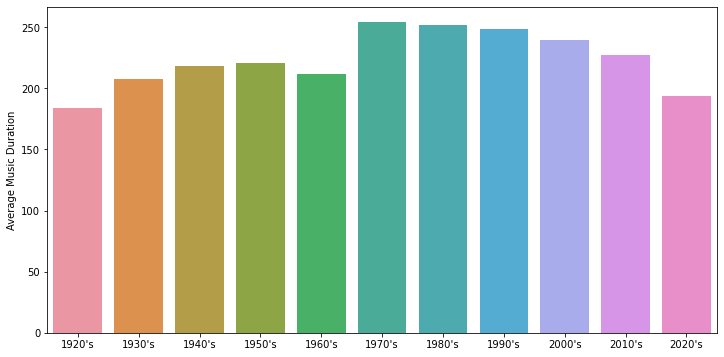

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=decades_df.index, y=decades_df["Average Music Duration"])

### Análise inicial

Parece que a partir dos anos 1990, quando a tecnologia começou a ter maior impacto cotidiano na vida das pessoas, o tempo médio de duração das músicas realmente começou a decrescer. E será que esse decrescimento também foi acompanhado de outras tendências gerais, como um maior alcance de determinado estilo em relação aos demais?

No intuito de descobrir isto, podemos fazer uma analise de qual foi o gênero mais popular em cada década, e tentar procurar um padrão de 1990-2020, o período que está sendo aqui considerado.

Para isso, vamos usar outra base de dados, que possui informações relativamente também aos gêneros musicais:

In [3]:
genres_data = pd.read_csv("data_by_artist_o.csv")
genres_data.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


Com a verificação que o data frame foi carregado com sucesso, vamos buscar os genêros mais populares de cada década.

In [ ]:
# qual data frame ou api traz uma relação entre gênero e ano?

"""def genre_by_decades(data_frame :'data_frame', decades_dict: dict) -> dict:
    current_decade = 1920
    for i in range(11):
        period_duration = data_frame.loc[(data_frame.year >= current_decade) & (data_frame.year < current_decade + 10)]
        decade_genres = []
        for j in range(len(period_duration)):
            year_genre = (period_duration.iloc[j]).genres
        
        current_decade += 10

    return decades_dict"""

Seria interessante, também, usar algum modelo probabilístico para tentar prever se a duração das média das músicas continuará sendo menor que nas últimas décadas, ou diminuirá ainda mais?